In [1]:
### Import Statements ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
%matplotlib inline
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
df = pd.read_csv('criminal_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56705 entries, 0 to 56704
Data columns (total 72 columns):
PERID        56705 non-null int64
IFATHER      56705 non-null int64
NRCH17_2     56705 non-null int64
IRHHSIZ2     56705 non-null int64
IIHHSIZ2     56705 non-null int64
IRKI17_2     56705 non-null int64
IIKI17_2     56705 non-null int64
IRHH65_2     56705 non-null int64
IIHH65_2     56705 non-null int64
PRXRETRY     56705 non-null int64
PRXYDATA     56705 non-null int64
MEDICARE     56705 non-null int64
CAIDCHIP     56705 non-null int64
CHAMPUS      56705 non-null int64
PRVHLTIN     56705 non-null int64
GRPHLTIN     56705 non-null int64
HLTINNOS     56705 non-null int64
HLCNOTYR     56705 non-null int64
HLCNOTMO     56705 non-null int64
HLCLAST      56705 non-null int64
HLLOSRSN     56705 non-null int64
HLNVCOST     56705 non-null int64
HLNVOFFR     56705 non-null int64
HLNVREF      56705 non-null int64
HLNVNEED     56705 non-null int64
HLNVSOR      56705 non-null int64
IRMCDCH

In [3]:
for i in df.columns[1:70]:
    df['new'] = df['new'] + df[i]

KeyError: 'new'

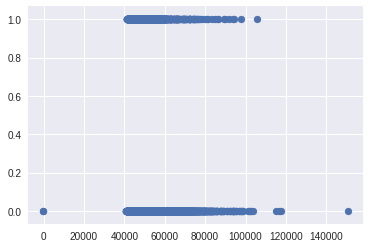

In [27]:
plt.scatter(df['new'],df['Criminal'])

In [7]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(df)\nscaled_features = scaler.transform(df)\ndf_feat = pd.DataFrame(scaled_features,columns=df.columns)\ndf_feat.head()'

In [4]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(scaled_data)
x_pca = pd.DataFrame(pca.transform(scaled_data))
'''

'from sklearn.decomposition import PCA\npca = PCA(n_components=50)\npca.fit(scaled_data)\nx_pca = pd.DataFrame(pca.transform(scaled_data))\n'

In [5]:
for i in df.columns:
    df[i][df[i] < 0] = df[i].mean()
    

/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,99.0,...,1.0,2.0,1.0,1.0,2.0,2.0,3884.805998,40026.0,1.0,0
1,13005143,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,3.0,2.0,2.0,1627.108106,40015.0,2.0,1
2,67415143,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,3.0,2.0,2.0,4344.957980,40024.0,1.0,0
3,70925143,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,99.0,...,2.0,2.0,1.0,1.0,2.0,2.0,792.521931,40027.0,1.0,0
4,75235143,1.0,0.0,6.0,1.0,4.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1518.118526,40001.0,2.0,0
5,47745143,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,3.0,2.0,2.0,9129.229124,40035.0,2.0,0
6,33145143,4.0,3.0,6.0,1.0,4.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6561.895497,40043.0,2.0,0
7,63765143,4.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3341.718873,40006.0,2.0,0
8,57796143,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,99.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3384.147888,40021.0,2.0,0
9,66416143,4.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,99.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2636.943978,40006.0,1.0,0


In [7]:
test = SelectKBest(score_func=chi2, k=65)
fit = test.fit(df.drop('Criminal',axis=1),df['Criminal'])
#print(len(fit.scores_))
features = fit.transform(df.drop('Criminal',axis=1))
# summarize selected features
print(features.shape)
dfy = pd.DataFrame(data=features,columns=range(1,66))
dfyc = pd.DataFrame(df['Criminal'],columns=['66'])
dfy = pd.concat([dfy,df['Criminal']],axis=1)

(45718, 65)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Criminal',axis=1), 
                                                    df['Criminal'], test_size=0.2, 
                                                    random_state=101)

In [8]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#rf = RandomForestClassifier() #default 
rf = RandomForestClassifier(n_estimators=500)

In [26]:
model=ExtraTreesClassifier()
parameters={'n_estimators':[300,400,500],'max_features':['log2','sqrt'],'bootstrap':[False],'warm_start':[True],'criterion':["entropy","gini"]}

In [27]:
best_model = GridSearchCV(model,parameters,n_jobs=5,verbose=True)
best_model.fit(X_train,y_train)
best_model.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  2.7min finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 300,
 'warm_start': True}

In [28]:
from sklearn.metrics import classification_report
print(classification_report(best_model.predict(X_test),y_test))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      8638
          1       0.52      0.65      0.58       506

avg / total       0.95      0.95      0.95      9144



In [9]:
rf.fit(dfy.drop('Criminal',axis=1),dfy['Criminal'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
dft = pd.read_csv('criminal_test.csv')
dft. head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [19]:
test = SelectKBest(score_func=chi2, k=65)
#print(len(fit.scores_))
features = fit.transform(dft)
# summarize selected features
print(features.shape)
dfyt = pd.DataFrame(data=features,columns=range(1,66))

(11430, 65)


In [29]:
final_predict = pd.DataFrame(best_model.predict(dft),columns=['Criminal'])
result = pd.DataFrame(dft['PERID'],columns=['PERID'])
result = pd.concat([result,final_predict],axis=1)
result['Criminal'].value_counts()

0    10851
1      579
Name: Criminal, dtype: int64

In [22]:
result.to_csv('final_predictions.csv',index=False)

In [107]:
dfs = pd.read_csv('final_predictions.csv')